# Assignment #4 - Neural Networks

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Rajendra Jadi <br>  801023390 </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The objective of this assignment explore neural networks by implmenting logistic regression classification algorithm through the use of a neural net to classify entries of provided data into their correct respective classes. K-Cross validation will be used to determine the proper neural net structure for ideal results. The neural net logistic regression will then be compared to other classification algorithms performed in assignmet2.

# II. Data

The data being used in the assignmet is wine quality data from the UCI Machine Learning Repository. 

# Description of  data

 wine quality data from the UCI Machine Learning Repository. These two datasets are related to red and white variants of the Portuguese
Columns are features, including physicochemical measurements such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol, as well as a quality score between 0 and 10 and whether the wine is a red or white.

Some initial observations here:

There are 13 numeric variables.
X appears to be the unique identifier.
quality is an ordered, categorical, discrete variable. From the literature, this was on a 0-10 scale, and was rated by at least 3 wine experts. The values ranged only from 3 to 8, with a mean of 5.6 and median of 6.
All other variables seem to be continuous quantities (w/ the exception of the .sulfur.dioxide suffixes).
From the variable descriptions, it appears that fixed.acidity ~ volatile.acidity and free.sulfur.dioxide ~ total.sulfur.dioxide may possible by dependent, subsets of each other.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("wine2.txt",";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Plots to visualize data

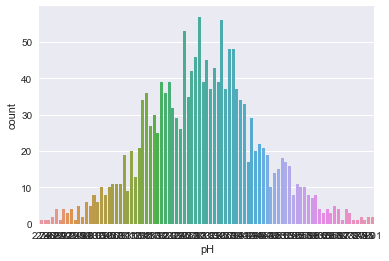

In [58]:
sns.countplot(x='pH',data=data)

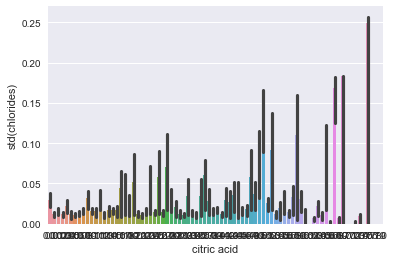

In [81]:
import numpy as  np
sns.barplot(x='citric acid',y='chlorides',data=data,estimator=np.std)

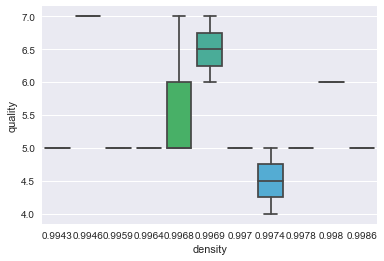

In [84]:
sns.boxplot(x='density',y='quality',data=data[:20])

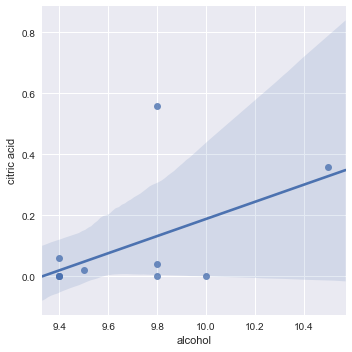

In [88]:
sns.lmplot(x='alcohol',y='citric acid',data=data[:10])

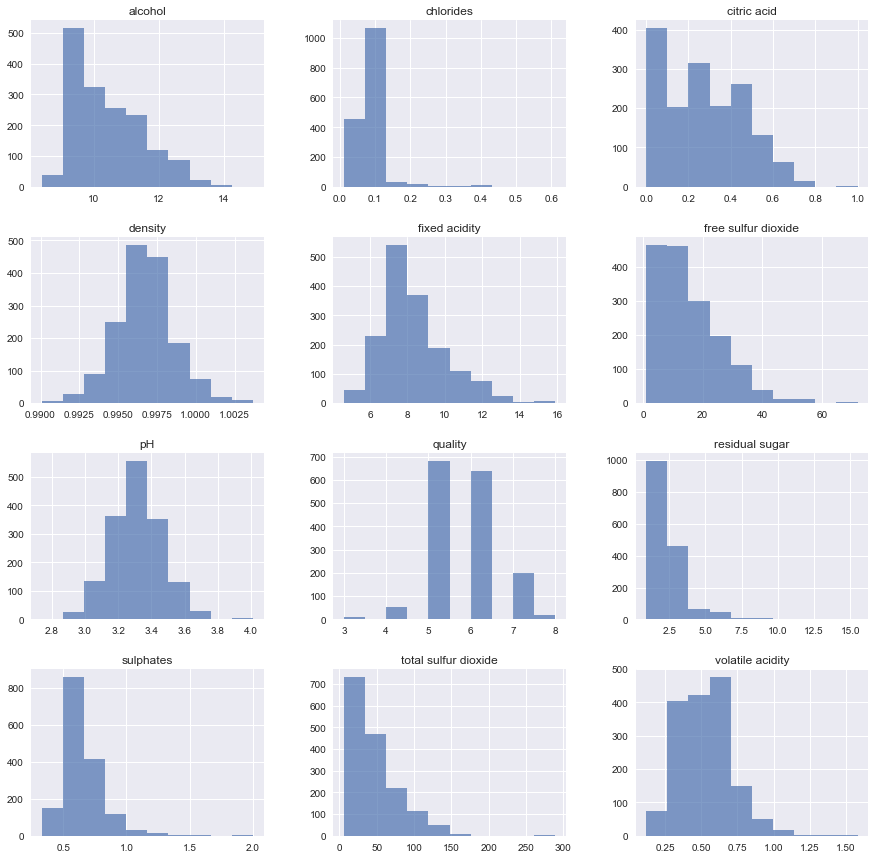

In [158]:
try:
    exclude=['id','lat','long']
    data.ix[:, data.columns.difference(exclude)].hist(alpha=0.7, figsize=(15, 15))
    plt.show()
except Exception:
    pass

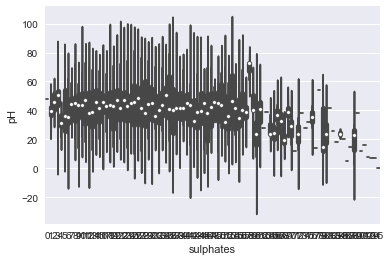

In [174]:
sns.violinplot(x="sulphates", y="pH", data=data,palette='rainbow')

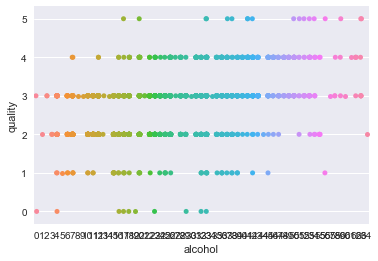

In [175]:
sns.stripplot(x="alcohol", y="quality", data=data,jitter=True)

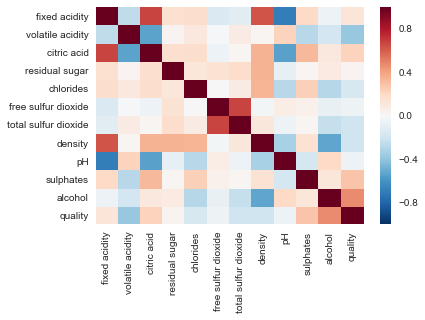

In [176]:
sns.heatmap(data.corr())

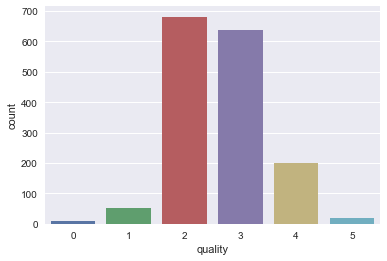

In [202]:
sns.countplot(x='quality',data=data)

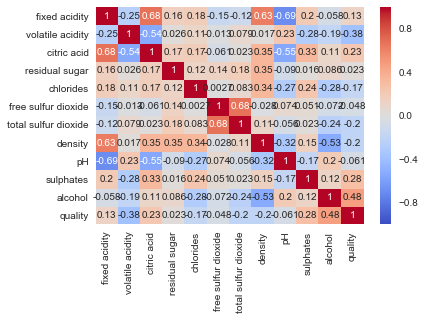

In [179]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

# Reading and analyzing the plots

-It is seen from above plots we see a general correlation between the quality of the wine and its alcohol content. The co-releation is linar as show in graph

In [160]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [161]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [92]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [166]:
#data=data.columns.values.tolist()

y=data['quality']
X = data.drop('quality', axis=1)

# Explaination of Codes

Lets Partition data into training and testing that will be used later.

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
X_train = X_train[:100].values
X_test = X_test[:100].values
y_train = y_train[:100].values
y_test = y_test[:100].values
y_test = np.where(y_test==0,-1,1)
y_train = np.where(y_train==0,-1,1)


In [168]:
print(len(X_train), "train +", len(X_test), "test")

100 train + 100 test


# III. Methods

- Summarize the nonlinear classification model. 
- Inherit the NeuralNet class for regression, implement your own version of Nonlinear Logistic Regression classifier. 
- Explain your codes. 
- Use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

# Summary of Neural Networks

Neural Nets are inspired by brain interaction and modeled as stacked neurons that work together to map data to nonlinear output. Neurons are grouped into layers with the input layer taking in the features of the data and the final layer producing the output. Each neuron takes in a collection of values, sum them together according to some function as its output. Using backpropagation these weights are updated overtime to produce more accurate output.

Below is the NeuralNetLogReg class inheriting from the provided NeuralNet class. The init function is modified to set the standardization of the target data to false. The forward function is modified to apply the softmax layer to the usual NeuralNet forward pass output. The objectf function is changed entirely to reflect the likelihood function of logistic regression. The train function is modified to convert the target data into indicator variables. And Finally the use function is modified to return the most probable classes using argmax.

K-Fold Cross-Validation is a method of spliting training data into K partitions and using each partition as the test data and training and validating with the remaining sets. By randomizing the data and performing Cross validation one can train off various partitions to help prevent skew from isolated outliers of data and determining the best parameters to use for each data set.

# Summary of Nonlinear Logistic Regression

The non linear classification model is Logistic Regression executed through a back propagation neural net. Logistic Regression is similar to linear regression but estimates probabilities via a logistic equation. In addition to using a gradient descent to reduce error, Logistic Regression uses indicator variables for the target. 

In [102]:
def partition(data):
    psize = data.shape[0] // 5
    pset = []
    for i in range(5):
        pset.append(data[psize * i:psize * (i + 1)])
    return pset

def accuracy(Y, T):
    return np.sum(Y == T)/len(Y)

def argmax(arr):
    maxi = 0;
    maxv = arr[0][0]
    for i in range(len(arr)):
        if arr[i][0] > maxv:
            maxv = arr[i][0]
            maxi = i
    return arr[maxi][1]

def argmaxnn(arr):
    maxi = 0;
    maxv = arr[0][0]
    for i in range(len(arr)):
        if arr[i][0] > maxv:
            maxv = arr[i][0]
            maxi = i
    return arr[maxi]

def RunValidation(Xtrain, Ttrain, classifier):
    model = CrossValidation(Xtrain, Ttrain, classifier, [{'alpha':10}, {'alpha':1}, {'alpha':0.1}, {'alpha':0.01}, {'alpha':0.001}, {'alpha':0.0001}])
    return argmax(model)
    
def RunValidationTest(Xtrain, Ttrain, Xtest, Ttest, classifier):
    model = RunValidation(Xtrain, Ttrain, classifier)
    print(accuracy(model.predict(Xtest), Ttest.T))

def CrossValidation(X, T, classifier, parameters):
    Xpart = partition(X)
    Tpart = partition(T)
    
    FinalRecords = None
    
    for test in range(5):
        Xtest = Xpart[test]
        Ttest = Tpart[test]
        
        records = None
        
        for val in range(5):
            if test == val: continue
            Xval = Xpart[val]
            Tval = Tpart[val]
            
            Xtrain = np.array([])
            Ttrain = np.array([])
            for i in range(5):
                if i == test or i == val: continue
                if Xtrain.size == 0:
                    Xtrain = Xpart[i]
                    Ttrain = Tpart[i]
                np.concatenate((Xtrain, Xpart[i]), axis=0)
                np.concatenate((Ttrain, Tpart[i]), axis=0)
            
            for param in parameters:
                model = classifier()
                model.fit(Xtrain, Ttrain)
                pred = model.predict(Xval)
                
                acc = accuracy(pred, Tval.T)
                if records == None: records = [[acc, param]]
                else: records.append([acc, param])
                    
        bestParam = argmax(records)
        bestModel = classifier()
        Xtrain = np.array([])
        Ttrain = np.array([])
        for i in range(5):
            if i == test: continue
            if Xtrain.size == 0:
                Xtrain = Xpart[i]
                Ttrain = Tpart[i]
            np.concatenate((Xtrain, Xpart[i]), axis=0)
            np.concatenate((Ttrain, Tpart[i]), axis=0)
            
        bestModel.fit(Xtrain, Ttrain)
        finalPred = bestModel.predict(Xtest)
        finalAcc = accuracy(finalPred, Ttest.T)
        
        if FinalRecords == None: FinalRecords = [[finalAcc, bestModel]]
        else: FinalRecords.append([finalAcc, bestModel])
    return FinalRecords

def CrossValidationNN(X, T, parameters):
    Xpart = partition(X)
    Tpart = partition(T)
    
    FinalRecords = None
    
    for test in range(5):
        Xtest = Xpart[test]
        Ttest = Tpart[test]
        
        records = None
        
        for val in range(5):
            if test == val: continue
            Xval = Xpart[val]
            Tval = Tpart[val]
            
            Xtrain = np.array([])
            Ttrain = np.array([])
            for i in range(5):
                if i == test or i == val: continue
                if Xtrain.size == 0:
                    Xtrain = Xpart[i]
                    Ttrain = Tpart[i]
                np.concatenate((Xtrain, Xpart[i]), axis=0)
                np.concatenate((Ttrain, Tpart[i]), axis=0)
            
            for param in parameters:
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                pred = model.use(Xval)
                
                acc = accuracy(pred, Tval.T)
                if records == None: records = [[acc, param]]
                else: records.append([acc, param])
                    
        bestParam = argmax(records)
        bestModel = NeuralNetLogReg(bestParam)
        Xtrain = np.array([])
        Ttrain = np.array([])
        for i in range(5):
            if i == test: continue
            if Xtrain.size == 0:
                Xtrain = Xpart[i]
                Ttrain = Tpart[i]
            np.concatenate((Xtrain, Xpart[i]), axis=0)
            np.concatenate((Ttrain, Tpart[i]), axis=0)
            
        bestModel.train(Xtrain, Ttrain)
        finalPred = bestModel.use(Xtest)[0]
        finalAcc = accuracy(finalPred, Ttest.T)
        
        if FinalRecords == None: FinalRecords = [[finalAcc, bestParam, bestModel]]
        else: FinalRecords.append([finalAcc, bestParam, bestModel])
    return FinalRecords

# Explaination of Codes

In the below class Logistic regression using Neural net is implemented. The differenct methods in the class are forward, objectf, train and use. Train is ued to train the model using the train data set and use is used for testing the model. The implementation can be found below.

In [103]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """
    def __init__(self, nunits):
        # if you think, you need additional items to initialize here,
        # add your code for it here
        NeuralNet.__init__(self,nunits)
        self.stdTarget = False
        
    def forward(self, X):
        def soft_max(z):
            return  np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        # Looking at the final summary or comparison table in lecture note,
        # add your codes for forward pass for logistic regression
        t, Z = NeuralNet.forward(self, X)
        t = soft_max(t) #apply softmax layer here to T
        return t, Z

    def _objectf(self, T, Y, wpenalty):
        # This is the error function that we want to minimize
        # what was it? take a look at the lecture note to fill in
        return -np.sum(T*np.log(Y))

    def train(self, X, T, **params):
        # you must reuse the NeuralNet train since you already modified
        # the objective or error function (maybe both), 
        # you do not have many to change here.
        # MAKE SURE convert a vector label T to indicator matrix and
        # feed that for training
        T = np.array(pd.get_dummies(T.flatten())) #change to indicator matrix
        return NeuralNet.train(self, X, T, **params)

    def use(self, X):
        # going through forward pass, you will have the probabilities for each label
        # now, you can use argmax to find class labels
        # return both label and probabilities
        Y = NeuralNet.use(self,X)
        return np.argmax(Y,1), Y

# Explaination of Codes

The blow is the base class for Pocket algorithm and Logistic regression that is being taken from assignment 2. This base class is being used while implemening linear algorithms.

In [104]:
import numpy as np
import abc
from abc import ABC, abstractmethod
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    from abc import ABC, abstractmethod
    @abc.abstractmethod
    def use(self, X):
        pass 

### A. Pocket Algorithm

# Explaination of Codes
below is the implementation of Pocket algorithm. The methods are consturctor, compare, train

In [105]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w) 
        
    def compare(self,X, T):
        y = np.sign(X @ self.w)
        yp = np.sign(X @ self.w_pocket)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
     
    def train(self, X, T):
        X = self.normalize(X)
        #X = np.insert(X, 0, np.ones(len(X)), axis=1)
        #X = self. add_ones(X)
        alpha = 0.0001
        maxiter = 10
        for i in range(maxiter):
    
            converged = True
            for k in np.random.permutation(X.shape[0]): #range(N):
                y = self.w @ X[k,:]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * T[k] * X[k,:]
                    converged = False
                if self.compare(X, T) > 0: 
                    self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        pass
    
    def use(self, X):
        #X = np.insert(X, 0, np.ones(len(X)), axis=1)
        #X = self.normalize(X)
        #X = self.add_ones(X)
        X = (X - self.meanX) / self.stdX
        return X@self.w_pocket
        #thresh = np.std(Y)/2
        #for i in range(len(Y)):
         #   if Y[i]>thresh:
         #       Y[i] = -1
         #   else:
          #      Y[i] = 1
        #Y = Y.reshape(-1,1)
        #return Y
        #pass 

Train and testing the pocket alogirthm

In [106]:
pa = PocketAlgorithm()
pa.train(X_train, y_train)
Y1 = pa.use(X_test)


End of training:  9


## Plots of Classification Results

Plot of train and test results as seen below.

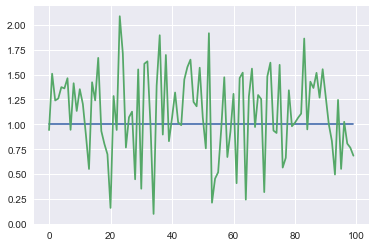

In [186]:
plt.plot(np.sort(y_test,0))

plt.plot((pa.use(X_test)))

## Examination of correct implementation with preliminary test with explanation

In [187]:
import numpy as np 
import pandas as pd

def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [188]:
confMatrix = confusion_matrix(np.sign(pa.use(X_test)), y_test)
print(confMatrix)
confMatrix = confMatrix.as_matrix()


     1
1  100


#### Classification Results

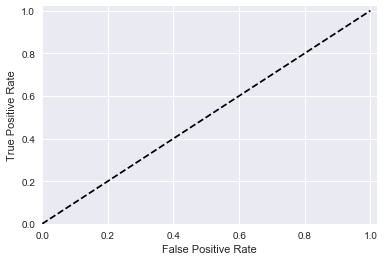

In [191]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1.02, 0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # fpr,tpr = roc_curve(pktY,Xtest)
    
fpr, tpr, thresholds = roc_curve(np.sign(pa.use(X_test)), y_test)
plot_roc_curve(fpr,tpr)
plt.show()


### Logistic Regression

In [192]:
class LogisticRegression(Classifier): 
    def __init__(self,alpha):
        Classifier.__init__(self)
        #self.ys = []
        #self.w = []
        self.w = None
        self.alpha = alpha
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
            #print(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

# for linear fx
    def g(self,X, w):
        #print((X @ self.w))
        #print(self.softmax(X @ self.w))
        return self.softmax(X @ w) 
    
    def train(self,X,T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)
        niter = 10
        #alpha = 0.1
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        
        
        #X1 = np.hstack((np.ones((N, 1)), X))
        #likeli = []
        for step in range(niter):
            ys = self.g(X, self.w)
            #print(self.ys)
            self.w += self.alpha * X.T @ (T - ys)
            
    def use(self, X):
        #X1t = np.hstack((np.ones((Xtest.shape[0],1)), X))
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        Y = self.g(Xs, self.w)
        return Y
        

In [193]:
log = LogisticRegression(0.1)
log.train(X_train, y_train)
Y1 = log.use(X_test)

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

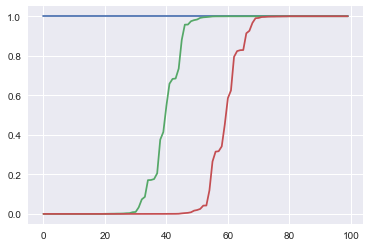

In [195]:
#Yl = np.argmax(Y, 1)
#Tl=np.where(Ttest==-1,0,1)

plt.plot(np.sort(y_test,0))
plt.plot(np.sort(Y1,0))



# Cross validation codes and explanation

K-Fold Cross-Validation is a method of spliting training data into K partitions and using each partition as the test data and training and validating with the remaining sets. By randomizing the data and performing Cross validation one can train off various partitions to help prevent skew from isolated outliers of data and determining the best parameters to use for each data set.

In [196]:
class K_Validation():
    def __init__(self, ):
        self.testErrs = []
        
    def cross_validation(self, k, X, T, model):
        size = int(len(X) / k)
        Xdata_split = np.split(X, k)
        Tdata_split = np.split(T, k)
        testErrs = []
        
        for i in range(k): # Run through tests
            print("NEW TEST", i)
            print("Xdata_split size", len(Xdata_split))
            Xtest = Xdata_split[i]
            Ttest = Tdata_split[i]
            
            for v in range(k): # Run through validations
                if v == i:
                    continue 
                else:
                    print("NEW VALIDATION", v)
                    Xvalid = Xdata_split[v]
                    Tvalid = Tdata_split[v]
                    print("Tvalid", Tvalid.shape)
                    print("Xvalid", Xvalid.shape)
                    Xtrain = np.concatenate([x for z,x in enumerate(Xdata_split) if z!=v and z!=i])
                    Ttrain = np.concatenate([x for z,x in enumerate(Tdata_split) if z!=v and z!=i])
                    print("Xtrain After Concat", Xtrain.shape)
                    print("Ttrain After Concat", Ttrain.shape)
  
            Xtrain = np.concatenate([x for z,x in enumerate(Xdata_split) if z!=i])
            Ttrain = np.concatenate([x for z,x in enumerate(Tdata_split) if z!=i])
            print("Xtrain After Concat", Xtrain.shape)
            print("Ttrain", Ttrain.shape)
            
            model.train(Xtrain, Ttrain)
            finalPred, Y = model.use(Xtest)
            print("argmax Y Shape", finalPred.shape)
            #print("argmax Y:", np.array(finalPred))
            #print("Y", Y)
            print("Ttest", np.array(Ttest).shape)
            finalAcc = np.sum(finalPred == Ttest) / len(finalPred)
            testErrs.append(finalAcc)
            
        return testErrs

# IV - Results

- Pick one of classifieres in Assignment #2 and compare with Nonlinear Logistic Regression.
- Presents the results of applications of thw two classifiers.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

Below are the results from the NeuralNetLogReg model along with the end results from assignment 2 using the perception, and logistic regression models for comparison. Because my haberman dataset doesn't seem to have very high correlation, I also tested and compared the models on the iris data set to confirm the models were working correctly. K-cross validation was used to determine the parameters for the assignment 2 models, as well as the NeuralNetLogReg model. Interestingly I noticed that for both data sets, the NeuralNetLogReg performed relatively well even without any hidden layers and when run through cross validation with different structures more often resulted in a higher accuracy. This isn't what I would have expected, but perhaps due to the small feature size of both data sets, it was suffering from over fitting with the addition of neurons and hidden layers. The end results of NeuralNetLogReg for both data sets seemed very similar to the plain logistic regression model which was the best model from assignment 2 and only slightly better than linear regression, but I'd anticipate that the NeuralNetLogReg model might perform better on higher feature data.

# Explaination of Codes
Below we would run validation on different models and find the results i.e accuracy for each model. The model with more accuacy would be regarded as better algorithm than the rest.

In [197]:
import numpy as np
from sklearn.linear_model import Perceptron as SPerceptron
from sklearn.qda import QDA as SQDA
from sklearn.lda import LDA as SLDA
from sklearn.linear_model import LogisticRegression as SLogisticRegression
import warnings
warnings.filterwarnings("ignore")
wine = data

X = wine.loc[:, wine.columns != 'quality']
T = wine.loc[:, wine.columns == 'quality']

X = np.array(X)
T = np.array(T)

Xtrain = X[:600]
Xtest = X[600:]

Ttrain = T[:600]
Ttest = T[600:]

print("Perceptron:")
perceptron = RunValidation(Xtrain, Ttrain, SPerceptron)
print("Accuracy: ",accuracy(perceptron.predict(Xtest), Ttest.T))
    
print("QDA:")
qda = RunValidation(Xtrain, Ttrain, SQDA)
print("Accuracy: ",accuracy(qda.predict(Xtest), Ttest.T))
    
print("LDA:")
lda = RunValidation(Xtrain, Ttrain, SLDA)
print("Accuracy: ",accuracy(lda.predict(Xtest), Ttest.T))
    
print("LogisticRegression:")
logreg = RunValidation(Xtrain, Ttrain, SLogisticRegression)
print("Accuracy: ",accuracy(logreg.predict(Xtest), Ttest.T))


print("Neural Network--")

#neuralnet = CrossValidationNN(Xtrain, Ttrain, [[11,1,6], [11,2,6], [11,10,6], [11,30,40,40,30,6]])
#besttest = argmaxnn(neuralnet)
#bestnet = besttest[2]
#print(neuralnet)
#print(accuracy(bestnet.use(Xtest)[0], Ttest.T))

neuralnet = NeuralNetLogReg([11, 10, 6])
for i in range(10):
    neuralnet.train(Xtrain, Ttrain)
print("Accuracy: ", accuracy(neuralnet.use(Xtest)[0], Ttest.T))

Perceptron:
Accuracy:  0.367367367367
QDA:
Accuracy:  0.527527527528
LDA:
Accuracy:  0.516516516517
LogisticRegression:
Accuracy:  0.494494494494
Neural Network--
Accuracy:  0.408408408408


In [198]:
try:
    params = [16, 4, 2]
    log_nn = NeuralNetLogReg(params)
    acc = k_valid.cross_validation(5, X,T, log_nn)
except Exception:
    pass

# plots for results 

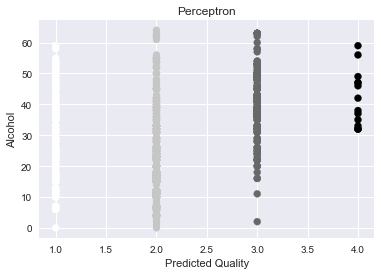

In [199]:
alcohol = wine['alcohol']
##PERCEPTRON
Y = perceptron.predict(X)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Y, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Predicted Quality')
ax.set_title('Perceptron')



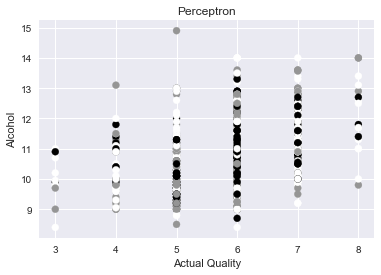

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(T, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Actual Quality')
ax.set_title('Perceptron')

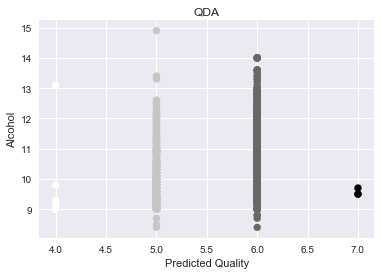

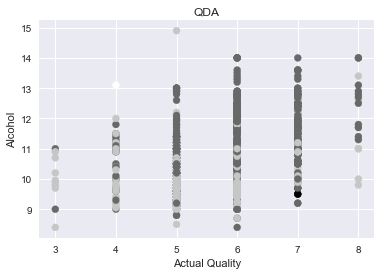

In [65]:
##QDA
Y = qda.predict(X)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Y, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Predicted Quality')
ax.set_title('QDA')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(T, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Actual Quality')
ax.set_title('QDA')

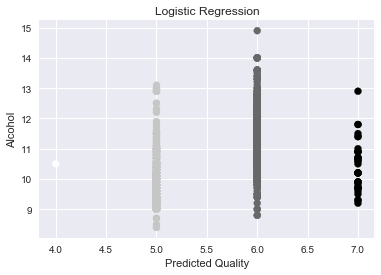

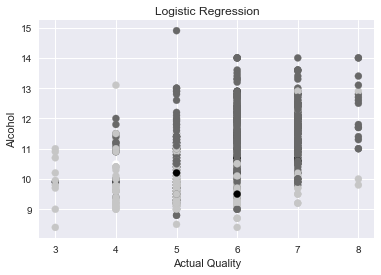

In [66]:
##LOGISTIC REGRESSION
Y = logreg.predict(X)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Y, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Predicted Quality')
ax.set_title('Logistic Regression')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(T, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Actual Quality')
ax.set_title('Logistic Regression')

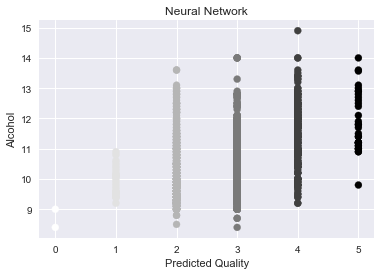

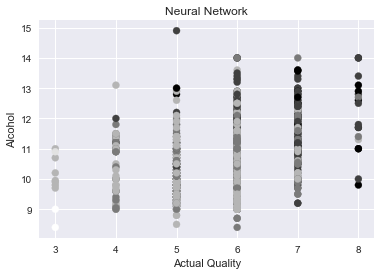

In [67]:
##NEURAL NETWORK Logisitic regression
Y = neuralnet.use(X)[0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Y, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Predicted Quality')
ax.set_title('Neural Network')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(T, alcohol, c=Y)
ax.set_ylabel('Alcohol')
ax.set_xlabel('Actual Quality')
ax.set_title('Neural Network')

# Discussions about parameter/network structure choice

models represent the underlying graph structure of conditional dependence between random variables which can be determined using their partial correlation or precision matrix. In a high-dimensional setting, the confusion matrix is used to uderstand the choice of parameter and kind of network required. The values ranged only from 3 to 8, with a mean of 5.6 and median of 6. All other variables seem to be continuous quantities (w/ the exception of the .sulfur.dioxide suffixes). From the variable descriptions, it appears that fixed.acidity ~ volatile.acidity and free.sulfur.dioxide ~ total.sulfur.dioxide may possible by dependent, subsets of each other.

# Discussions about classificaion model comparison

We could see from the evaluation rsults that the logistic regression using NN performed better than the others after running evaluation, you should see a loss of around .01. This seems low but we need a better way to see exactly how well our model is performing. For regression models, we can’t rely on a more straightforward measure like accuracy. So NN boosts the performance of the model. Below is the graph to highlight the comparision between the models.

[0.5625, 0.875, 1.0, 0.96875, 1.0]


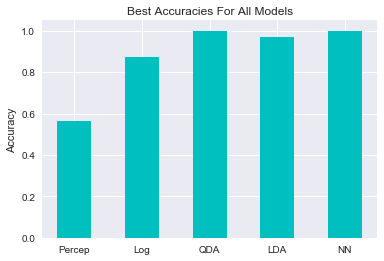

In [80]:
letter_top = [0.5625, 0.875, 1.0, 0.96875, 1.0]
key = ["Percep", "Log", "QDA", "LDA", "NN"]

x_pos = list(range(len(letter_top)))

plt.bar(left=x_pos, height=letter_top, width=.5,color='c')
plt.ylabel('Accuracy')
plt.xticks(x_pos, key)
plt.title("Best Accuracies For All Models")
print(letter_top)

# Discussion about the classification results to analyze what nonlinear logistic regression learned.

A very convenient and useful side effect of a logistic regression solution is that it doesn’t give you discrete output or outright classes as output. Instead you get probabilities associated with each observation. You can apply many standard and custom performance metrics on this probability score to get a cutoff and in turn classify output in a way which best fits your business problem.
In addition to above , logistic regression algorithm is robust to small noise in the data and is not particularly affected by mild cases of multi-collinearity. Severe cases of multi-collinearity can be handled by implementing logistic regression with L2 regularization, although if a parsimonious model is needed , L2 regularization is not the best choice because it keeps all the features in the model.
Where logistic regression starts to falter is , when you have a large number of features and good chunk of missing data. Too many categorical variables are also a problem for logistic regression.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

The challenge faced was was the lack of understanding of the NN code and what my goal was for the project. All this was clarified in class and once I understood what was going on the assignment was fairly easy. I enjoyed getting to mess around with a NN finally even if it was in a limited experience. Overall it was good learning NN.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
